# Statistische Modelle - Beispiel 4: k-Nearest Neighbors

## Einlesen der notwendigen Bibliotheken
Quelle: https://scikit-learn.org/stable/auto_examples/neighbors/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
# importieren des IRIS-Datensatzes
iris = pd.read_csv('irisdata.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sort
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Metadaten:
Der berühmte Iris-Datensatz:
Der Datensatz besteht aus 50 Messungen von drei Arten der Pflanze Iris (Iris setosa, Iris virginica and Iris versicolor). Es wurden jeweils die 4 Merkmale vermessen: Länge und Breite der Kelchblätter sowie Länge und Breite der Kronblätter (jeweils in cm). Basierend auf der Kombination der vier Grundmerkmale entwickelte Fischer (1936) eine Möglichkeit, diese Arten voneinander zu unterscheiden. Dieser Datensatz ist ein grundlegender Testdatensatz für verschiedene ML-Anwendungen.
Quellen: 
* R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x. hdl:2440/15227
* https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
# Teildatensatz, für Beispiel nur Kelchblätter betrachten
iris_lr = iris[['sepal_length', 'sepal_width', 'sort']]
iris_lr.head()

,sepal_length,sepal_width,sort
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [4]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

In [5]:
# Festlegen der Variablen X und y
y = iris_lr.pop('sort')
X = iris_lr

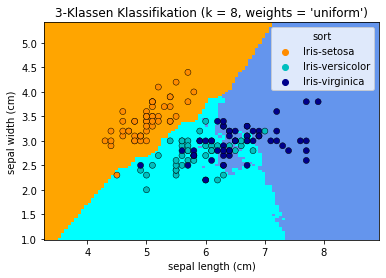

In [14]:
# Verschiedene Einstellungen für Wichtungen der Daten in unterschiedlichen Abständen betrachten 
# Wichtungen = weights in ["uniform", "distance"]
# Anzahl der nächsten Nachbarn (k)
weights = 'uniform'
n_neighbors = 8
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cmap_light,
        ax=ax, response_method="predict", plot_method="pcolormesh",
        xlabel='sepal length (cm)', ylabel='sepal width (cm)',
        shading="auto")

sns.scatterplot(x=iris_lr["sepal_length"],
        y=iris_lr["sepal_width"],
        hue=iris['sort'],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black")
plt.title("3-Klassen Klassifikation (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()

## Modellvalidierung

In [15]:
y_pred = clf.predict(X)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,49,1,0,50
Iris-versicolor,0,43,7,50
Iris-virginica,0,17,33,50
All,49,61,40,150


In [16]:
from sklearn.metrics import accuracy_score

print('Erreichte Modellgenauigkeit für den Trainingsadtensatz: {0:0.4f}'. format(accuracy_score(y, y_pred)))

Erreichte Modellgenauigkeit für den Trainingsadtensatz: 0.8333


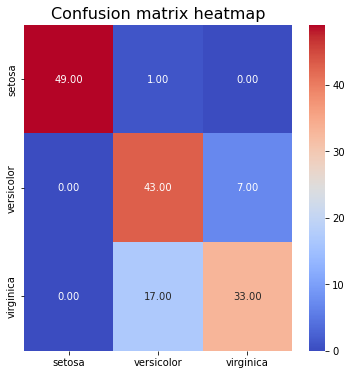

In [17]:
plt.figure(figsize=(6, 6))
x_axis_labels = ['setosa', 'versicolor', 'virginica'] # labels for x-axis
y_axis_labels = ['setosa', 'versicolor', 'virginica'] # labels for y-axis
sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt=".2f", cmap='coolwarm')
plt.title("Confusion matrix heatmap", fontsize=16)
plt.show()